In [255]:
#load the libraries and titanic data
#you can find it here :  https://www.kaggle.com/c/titanic/data 

import pandas as pd

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
#print the dataset shape

print(titanic.shape)

(891, 12)


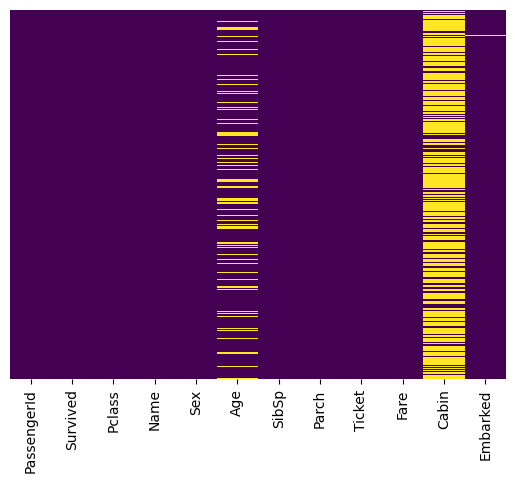

In [257]:
#plot the NaN values with a heatmap
#matplotlib.axes._subplots.AxesSubplot
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [258]:
#print the age % of NaN values
print(titanic['Age'].isnull().sum()/len(titanic)*100)

19.865319865319865


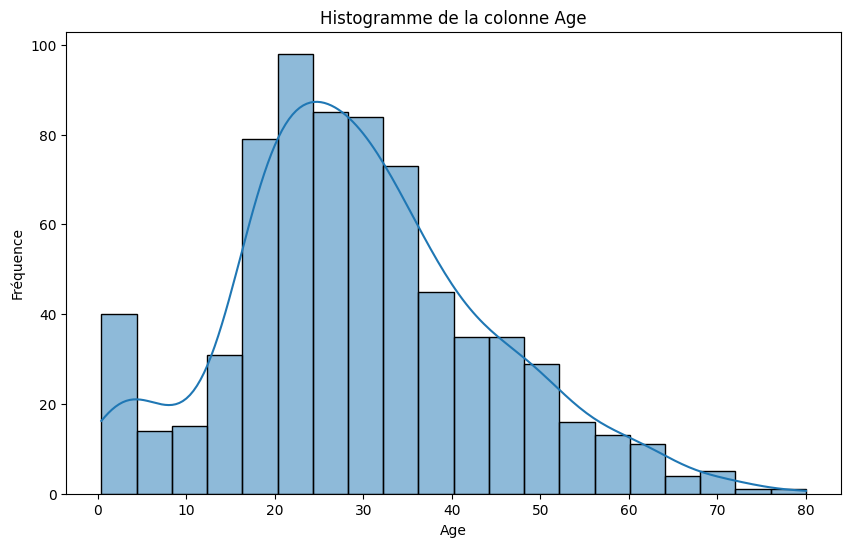

In [259]:
#print the histogram of the age column
plt.figure(figsize=(10, 6))
sns.histplot(data= titanic, x='Age', kde=True)
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)
plt.savefig('age_histogram.png')
plt.show()

In [260]:
#print the median and the mean of the age column

print(titanic['Age'].median())
print(titanic['Age'].mean())

28.0
29.69911764705882


In [261]:
#print the cabin % of NaN values
print(titanic['Cabin'].isnull().sum()/len(titanic)*100)


77.10437710437711


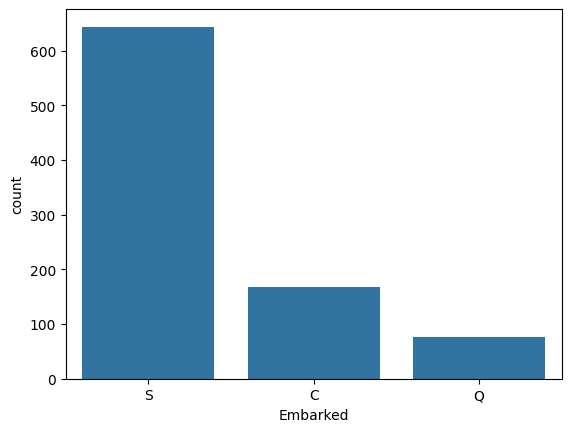

In [262]:
#print the embarked distribution 

sns.countplot(x='Embarked',data=titanic)
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 voici le format du dataframe avant  (891, 12)
 voici le format du dataframe apres  (891, 11)


/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/1106672606.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic2['Age'].fillna(titanic['Age'].median(), inplace=True)
/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/1106672606.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

<Axes: >

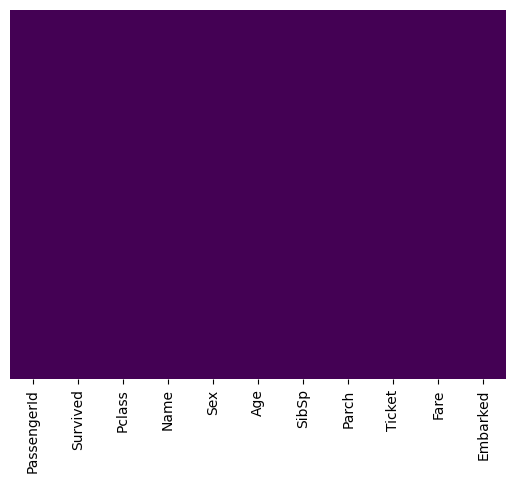

In [263]:
# We will make the following changes to the data:

# If "Age" is missing for a given row, we assign 28 (median age).
# If "Embarked" is missing for a given line, we assign "S" (most common embarked).
# We will ignore "Cabin" as a variable. There are too many missing values ​​it wouldn't make sense to assign values ​​to it.
#apply the preprocessing like above
#verify your results



print (titanic.columns)
print( " voici le format du dataframe avant ", titanic.shape)
titanic2 = titanic.drop("Cabin", axis=1, errors='ignore')
titanic2['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic2['Embarked'].fillna('S', inplace=True)
print( " voici le format du dataframe apres ",titanic2.shape)


# verify the results with another heatmap

sns.heatmap(titanic2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

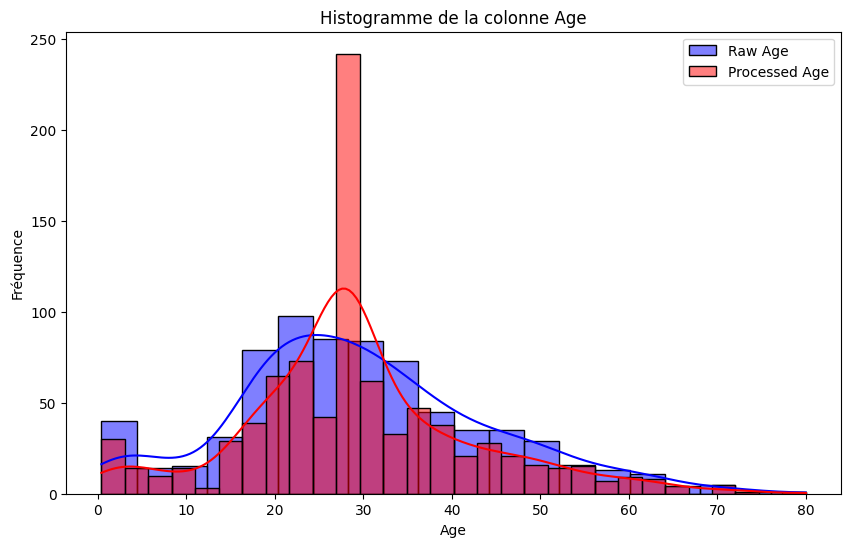

In [264]:
#print the histogram of the age column after and before processing 
# graphique avec 2 histogrammes dans la même figure
plt.figure(figsize=(10, 6))
sns.histplot(data= titanic, x='Age', kde=True, color='blue', label='Raw Age')
sns.histplot(data= titanic2, x='Age', kde=True, color='red', label='Processed Age')
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.legend()
# Sauvegarde du graphique (optionnel)
plt.savefig('age_histogram.png')
plt.show()

In [265]:
#create the feature 'TravelAlone'

titanic2['TravelAlone'] = (titanic2["SibSp"] + titanic2["Parch"] == 0).astype(int)
# enlever les colonnes SibSp et Parch
titanic2.drop(['SibSp', 'Parch'], axis=1, inplace=True)

print(titanic2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                               Heikkinen, Miss. Laina  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
..                                                 ...     ...   ...   
886                              Montvi

In [266]:
#use the get_dummies function to encode every needed features 

print(titanic2.columns)
# Pclass
titanic2 = pd.get_dummies(titanic2, columns=["Pclass"], prefix="Pclass")
# Embarqued
titanic2 = pd.get_dummies(titanic2, columns=["Embarked"], prefix="Embarked")
# Sex
titanic2 = pd.get_dummies(titanic2, columns=["Sex"], prefix="Sex")


print(titanic2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'TravelAlone'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare',
       'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')


In [267]:
#drop the columns that you don't need

# passengerId, Name, Ticket ,sex-female

titanic2.drop(['PassengerId', 'Name' , 'Ticket', 'Sex_female'], axis=1, inplace=True)

print(titanic2.columns)

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')


In [268]:
# test Data #print the null value of this dataset
titanic_test = pd.read_csv('test.csv')
print(titanic_test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [269]:
#do the same thing for the test dataset

titanic_test2 = titanic_test.drop("Cabin", axis=1, errors='ignore')
titanic_test2['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test2['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test2['Embarked'].fillna('S', inplace=True)
titanic_test2['TravelAlone'] = (titanic_test2["SibSp"] + titanic_test2["Parch"] == 0).astype(int)
titanic_test2.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Pclass"], prefix="Pclass")
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Embarked"], prefix="Embarked")
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Sex"], prefix="Sex" )
titanic_test2.drop(['PassengerId', 'Name' , 'Ticket', "Sex_female"], axis=1, inplace=True)

print(titanic_test2.isnull().sum())

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64


/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/406470918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test2['Age'].fillna(titanic_test['Age'].median(), inplace=True)
/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/406470918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

Text(0, 0.5, 'Fréquence')

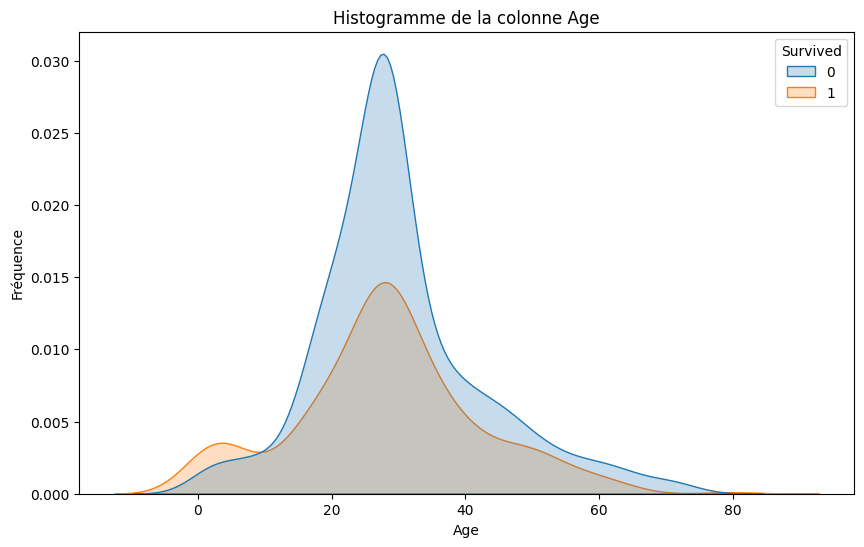

In [270]:
#print the age feature distribution and highlight the survived feature

plt.figure(figsize=(10, 6))
sns.kdeplot(data= titanic2, x='Age', fill=True, hue='Survived')
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)




In [271]:
#add the "IsMinor" variable to your data (a person is considered a minor if they are under 16)

titanic2['IsMinor'] = (titanic2['Age'] < 16).astype(int)
#test data
titanic_test2['IsMinor'] = (titanic_test2['Age'] < 16).astype(int)



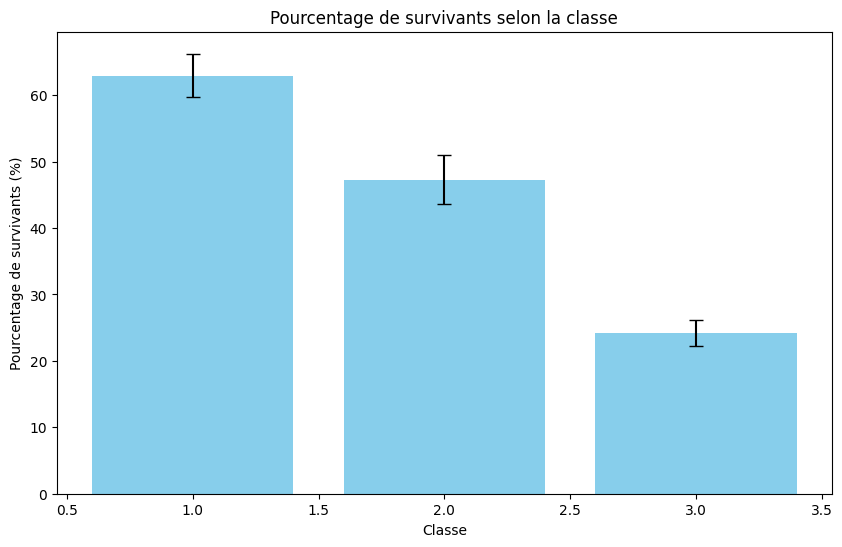

In [272]:
#show survivors by class // only survivors






# Calculer le pourcentage de survivants par classe
survival_rates = titanic.groupby('Pclass')['Survived'].mean() * 100

# Calculer la taille d'échantillon pour chaque classe pour la marge d'erreur
survival_counts = titanic.groupby('Pclass')['Survived'].agg(['mean', 'count'])
survival_counts['std_error'] = (survival_counts['mean'] * (1 - survival_counts['mean']) / survival_counts['count']) ** 0.5 * 100

# Tracer le graphique en barres avec les marges d’erreur

plt.figure(figsize=(10, 6))
plt.bar(survival_rates.index, survival_rates, yerr=survival_counts['std_error'], capsize=5, color='skyblue')



# Ajout des titres et labels
plt.title("Pourcentage de survivants selon la classe")
plt.xlabel("Classe")
plt.ylabel("Pourcentage de survivants (%)")

plt.show()



<Axes: xlabel='Embarked', ylabel='Survived'>

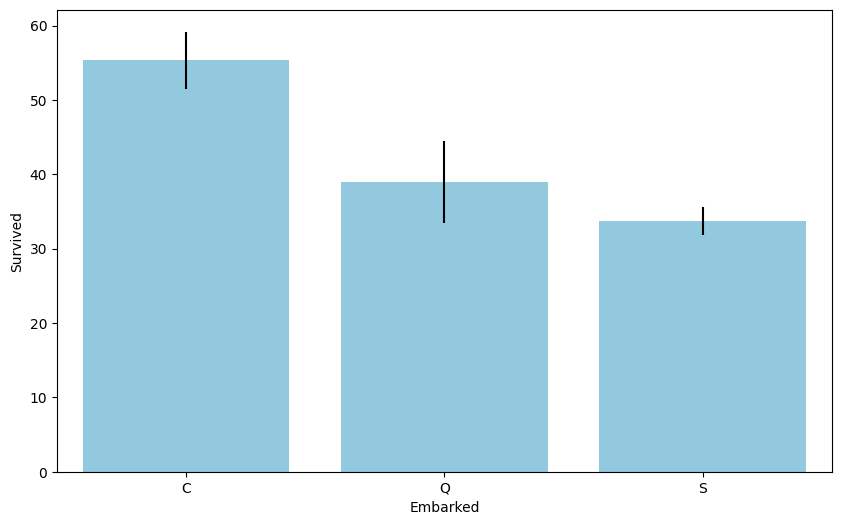

In [273]:
#do the same for embarked feature

# Calculer le pourcentage de survivants par quai d'embarquement
survival_rates = titanic.groupby('Embarked')['Survived'].mean() * 100

# Calculer la taille d'échantillon pour chaque quai pour la marge d'erreur
survival_counts = titanic.groupby('Embarked')['Survived'].agg(['mean', 'count'])
survival_counts['std_error'] = (survival_counts['mean'] * (1 - survival_counts['mean']) / survival_counts['count']) ** 0.5 * 100

# Tracer le graphique en barres avec les marges d’erreur avec seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates, yerr=survival_counts['std_error'], capsize=0.1, color='skyblue')




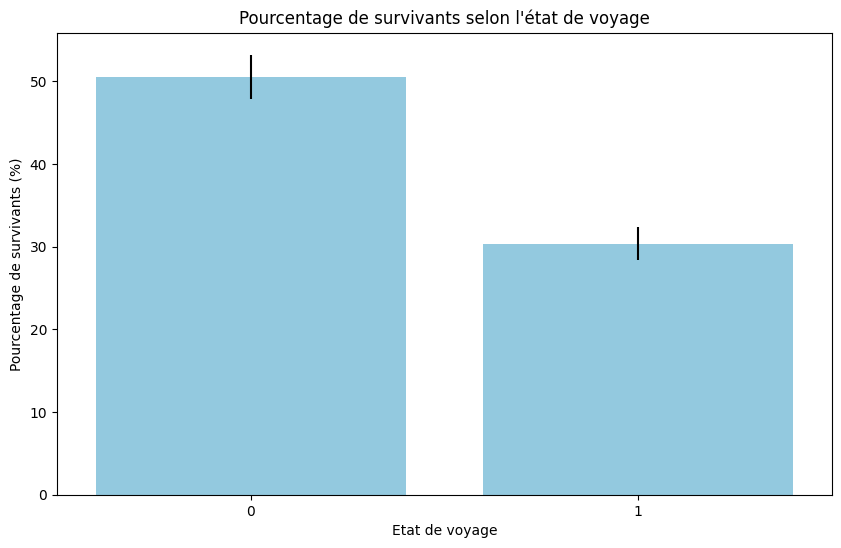

In [274]:
#do the same for the Traveling Alone feature we've created earlier 

# Calculer le pourcentage de survivants par etat de voyage
survival_rates = titanic2.groupby('TravelAlone')['Survived'].mean() * 100

# Calculer la taille d'échantillon pour chaque etat de voyage pour la marge d'erreur
survival_counts = titanic2.groupby('TravelAlone')['Survived'].agg(['mean', 'count'])
survival_counts['std_error'] = (survival_counts['mean'] * (1 - survival_counts['mean']) / survival_counts['count']) ** 0.5 * 100

# Tracer le graphique en barres avec les marges d’erreur avec seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates, yerr=survival_counts['std_error'], capsize=0.1, color='skyblue')

# Ajout des titres et labels

plt.title("Pourcentage de survivants selon l'état de voyage")
# 0 = non accompagné, 1 = accompagné
plt.xlabel("Etat de voyage")
plt.ylabel("Pourcentage de survivants (%)")

plt.show()



Text(0, 0.5, 'Pourcentage de survivants (%)')

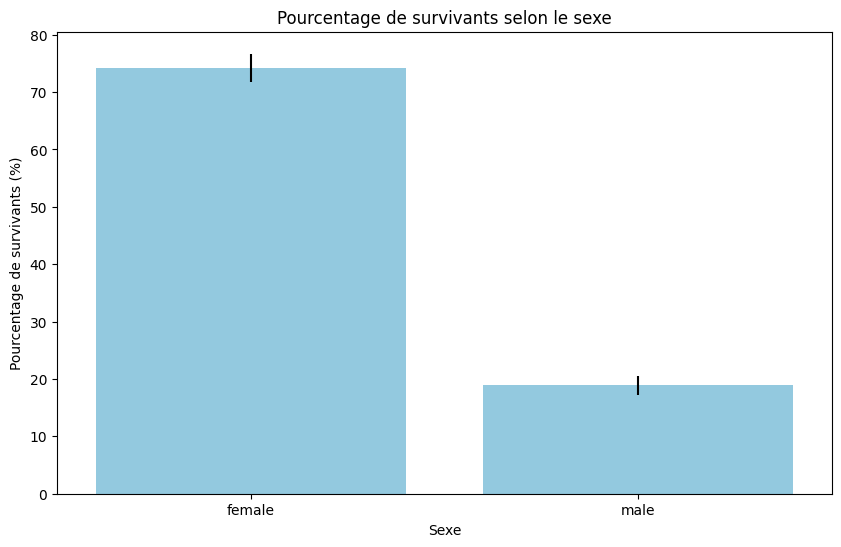

In [275]:
#gender distribution of survivors

# Calculer le pourcentage de survivants par sexe
survival_rates = titanic.groupby("Sex")["Survived"].mean() * 100

# Calculer la taille d'échantillon pour chaque sexe pour la marge d'erreur
survival_counts = titanic.groupby("Sex")["Survived"].agg(["mean", "count"])
survival_counts["std_error"] = (
    survival_counts["mean"] * (1 - survival_counts["mean"]) / survival_counts["count"]
) ** 0.5 * 100


# Tracer le graphique en barres avec les marges d’erreur avec seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates, yerr=survival_counts["std_error"], capsize=0.1, color="skyblue")

# Ajout des titres et labels
plt.title("Pourcentage de survivants selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Pourcentage de survivants (%)")


In [276]:
#define x and y for the model


X = titanic2.drop('Survived', axis=1)
y = titanic2['Survived']



#instanciate a LogisticRegression estimator in sklearn 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

#create a RFE model and select 4 attributes
from sklearn.feature_selection import RFE

#Selected features: ['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']
rfe = RFE(estimator=logreg, n_features_to_select=4)
rfe = rfe.fit(X, y)
print("Selected features: " )
print(list(X.columns[rfe.support_]))












Selected features: 
['Pclass_1', 'Pclass_3', 'Sex_male', 'IsMinor']


In [277]:
#create a RFE model and select 8 attributes
#Selected features: ['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']

rfe8 = RFE(estimator=logreg, n_features_to_select=8)
rfe8 = rfe8.fit(X, y)

print("Selected features: " )
print(list(X.columns[rfe8.support_]))



Selected features: 
['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']


In [278]:
#instantiate an RFECV object (with a scoring='accuracy') and do as stated above

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#instanciate the estimator

rfecv = RFECV(estimator=logreg, scoring='accuracy')

#Optimal number of features: 8
#Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
rfecv = rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)

print("Selected features: " )
print(list(X.columns[rfecv.support_]))


Optimal number of features: 10
Selected features: 
['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']


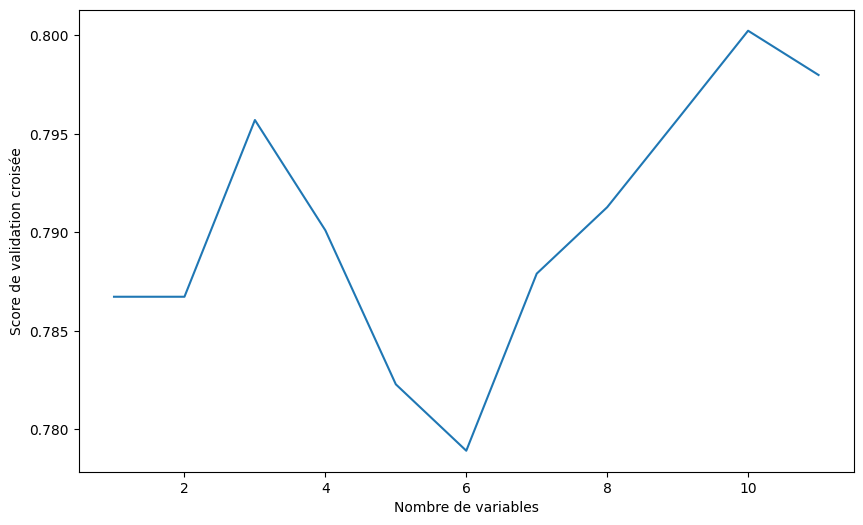

In [279]:
#plot features numbers VS. cross-validation scores


plt.figure(figsize=(10, 6))
plt.xlabel("Nombre de variables")
plt.ylabel("Score de validation croisée")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [280]:

#create the new dataframe and print the shape

X_new = X[X.columns[rfecv.support_]]
print(X_new.shape)
y.shape


(891, 10)


(891,)

In [281]:
# split your data with alpha = 0.2 and a randopm state of 42

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

#fit the model and print the score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#intercept_scaling=1, max_iter=100, multi_class='warn',
#n_jobs=None, penalty='l2', random_state=None, solver='warn',
#tol=0.0001, verbose=0, warm_start=False)

log2 = LogisticRegression(max_iter=1000)

log2.fit(X_train, y_train)
print(log2.score(X_test, y_test))



0.8044692737430168


In [282]:
#make a prediction on the test set

y_pred = log2.predict(X_test)

#make a prediction with the predict_proba function and display
# the accuracy of the model
# the cross-entropy loss
# the air below the ROC curve (AUC)
# say what these metrics do ? 

from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

y_pred_proba = log2.predict_proba(X_test)[:, 1]

print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))
print("Cross-entropy loss: %.4f" % log_loss(y_test, y_pred_proba))
print("AUC: %.4f" % roc_auc_score(y_test, y_pred_proba))

# these metrics are used to evaluate the performance of a classification model.
# Accuracy measures the proportion of correct predictions.
# Cross-entropy loss measures the difference between the predicted probabilities and the actual labels.
# AUC measures the ability of the model to distinguish between positive and negative classes.




Accuracy: 0.8045
Cross-entropy loss: 0.4305
AUC: 0.8739


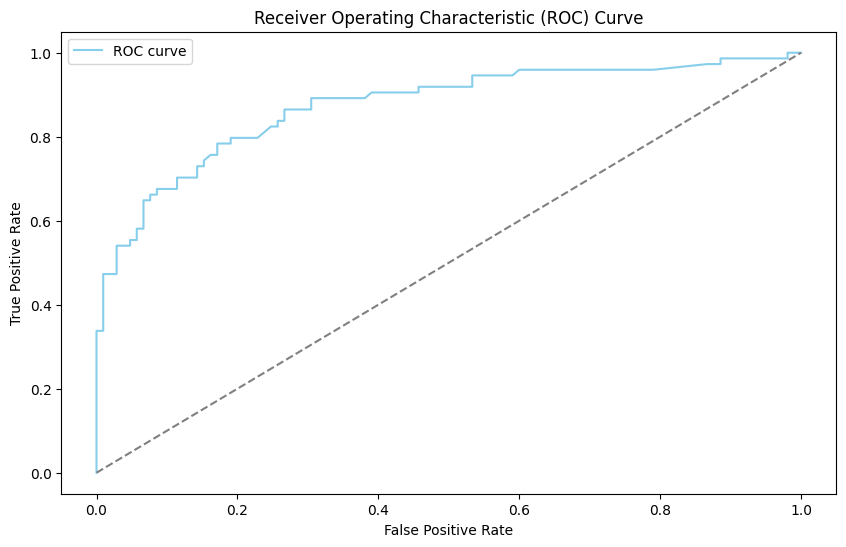

In [283]:
#display roc curve
#what do you notice ?

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, color='skyblue', label='ROC curve')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

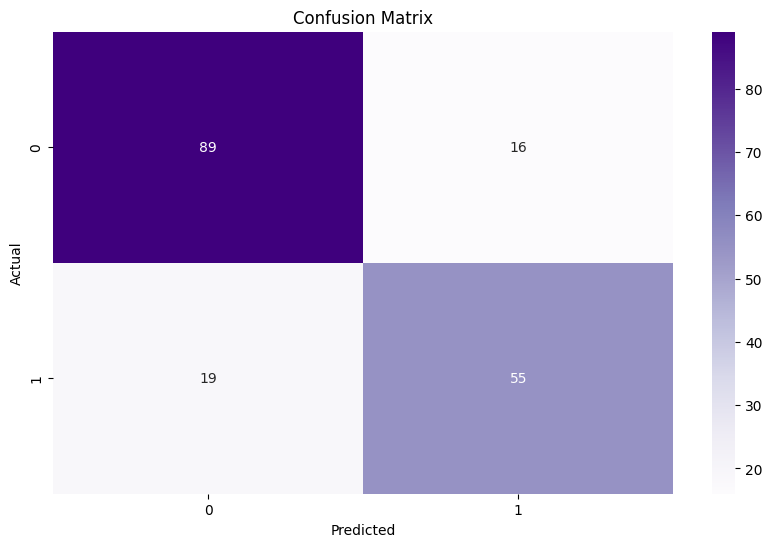

In [284]:
#print the confusion matrix and the classification report (optional)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# seaborn heatmap

plt.figure(figsize=(10, 6))
# color from dark purple to light purple
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [286]:
#do the same with a cross-validation (10epoch) on your logistic regression
#use scroing accuracy, neg_log_loss, roc_auc as before

from sklearn.model_selection import cross_val_score

acc = cross_val_score(log2, X_new, y, cv=10, scoring='accuracy', verbose=0)
ce = cross_val_score(log2, X_new, y, cv=10, scoring='neg_log_loss', verbose=0)
auc = cross_val_score(log2, X_new, y, cv=10, scoring='roc_auc', verbose=0)


print(" AVG AUC: %.4f" % auc.mean())
print("AVG Cross-entropy loss: %.4f" % -ce.mean())
print("AVG Accuracy: %.4f" % acc.mean())



 AVG AUC: 0.8504
AVG Cross-entropy loss: 0.4539
AVG Accuracy: 0.8036
